In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0)

/Users/JacquesPierre/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

Now check to see how large our subset df.

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [4]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [5]:
#your code here

zero_dict = {88: 0,
             77: np.nan,
             99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [56]:
df.shape

(34545, 360)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [6]:
#descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

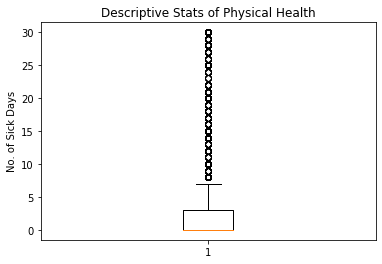

In [7]:
# graphic showing those descriptive stats
phys_rem_nans = df['PHYSHLTH'].dropna()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(phys_rem_nans)
ax.set_ylabel('No. of Sick Days')
ax.set_title('Descriptive Stats of Physical Health');

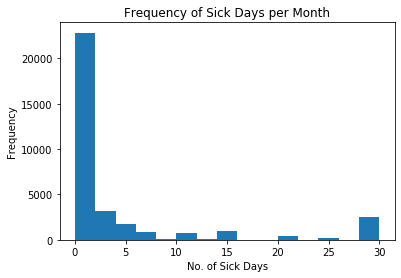

In [59]:
#graphic showing the distribution of data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(phys_rem_nans, bins=15)
ax.set_title('Frequency of Sick Days per Month')
ax.set_xlabel('No. of Sick Days')
ax.set_ylabel('Frequency');

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [9]:
# code to calculate the average number of sick days by state
avg_SickDays_byState = df.groupby('_STATE')['PHYSHLTH'].mean()
avg_SickDays_byState

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

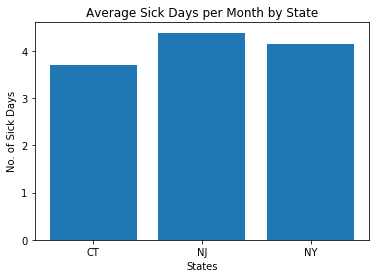

In [10]:
# code to graph those averages using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
states=['CT', 'NJ', 'NY']
ax.bar(states,avg_SickDays_byState);
ax.set_title('Average Sick Days per Month by State')
ax.set_xlabel('States')
ax.set_ylabel('No. of Sick Days');

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [63]:
# code to create new colum for chronically sick
df['CHRON_SICK'] = 0
def is_Chronic(df):
    if df['PHYSHLTH'] >= 20:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

# Sean - df['CHRONIC'] = np.where(df['PHYSHLTH']>=20, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [64]:
# code to calculate averages per state
chronSick_ppl = df.groupby('_STATE')['CHRON_SICK'].mean()*100
chronSick_ppl

_STATE
9.0      8.301851
34.0    10.394602
36.0     9.119112
Name: CHRON_SICK, dtype: float64

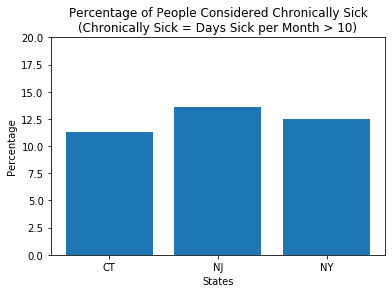

In [13]:
# create graphic to compare chronically sick by state
fig = plt.figure()
ax = fig.add_subplot(111)
states=['CT', 'NJ', 'NY']
ax.bar(states,chronSick_ppl)
ax.set_title('Percentage of People Considered Chronically Sick\n(Chronically Sick = Days Sick per Month > 10)')
ax.set_xlabel('States')
ax.set_ylabel('Percentage')
ax.set_ylim(0,20);

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [65]:
smoke100_dict = {7: 2,
                 9: 2}
df['SMOKE100'] = df['SMOKE100'].replace(smoke100_dict)

In [52]:
# Clean up the values
df['SMOKER'] = 0
def is_Smoker(df):
    if df['SMOKDAY2'] == 1:
        return 'Everyday'
    elif df['SMOKDAY2'] == 2:
        return 'Some days'
    elif df['SMOKDAY2'] == 3:
        return 'Never'
    else:
        if df['SMOKE100'] == 1:
            return 'Have smoked'
        else:
            return 'Never'
df['SMOKER'] = df.apply(is_Smoker, axis=1)

In [66]:
df_parsed = df[['_STATE','PHYSHLTH','CHRON_SICK','SMOKDAY2','SMOKE100','SMOKER']]
df_parsed.shape
# df_ChronicsAndSmokers = pd.DataFrame(df_parsed.groupby(['_STATE', 'SMOKER'])['CHRON_SICK'].agg('mean'))
# df_ChronicsAndSmokers

(34545, 6)

In [35]:
# Calculate the descriptive statistics of the variable
df_parsed['SMOKER'].describe()

count    34545.000000
mean         0.160747
std          0.471279
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: SMOKER, dtype: float64

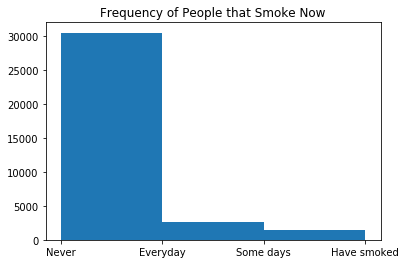

In [55]:
# Generate a histogram for the variable
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df_parsed['SMOKER'],bins=3)
ax.set_title('Frequency of People that Smoke Now');

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  